## Installing and importing libraries

### Easy OCR:
EasyOCR in many aspects performs better than tesseract(another OCR engine created by google used with python package Pytesseract). It is easy to use and needs only a few lines of code to implement and has proper accuracy for most tested images and extended over a wide range of languages.

paste in cmd:

pip install easyocr

### Imutils:
Imutils are a series of convenience functions to make basic image processing functions such as translation, rotation, resizing, skeletonization, and displaying Matplotlib images easier with OpenCV and both Python 2.7 and Python 3.

paste in cmd:

pip install imutils

### SQL:
Download SQL from here :  https://www.mysql.com/downloads/

and then open cmd and install sql connector by using:

C:\Users\Your Name\AppData\Local\Programs\Python\Python36-32\Scripts>python -m pip install mysql-connector-python 

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## Importing image

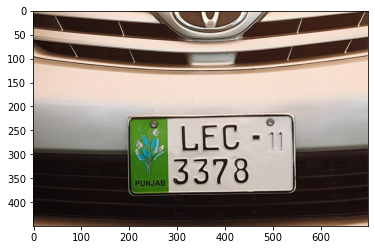

In [2]:
img = cv2.imread('numberplate.jpg')
plt.imshow(img)

## Converting into gray scale:

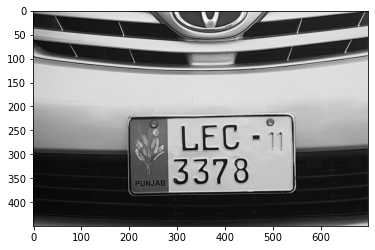

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## Finding edges for localization:

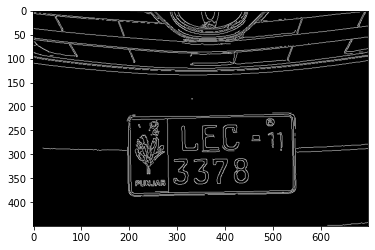

In [4]:
b_filter = cv2.bilateralFilter(gray, 11, 17, 17) #It will reduce noise
edged = cv2.Canny(b_filter, 30, 200) #it is detecting edge
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## Finding counters and applying mask

In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [7]:
location

array([[[540, 226]],

       [[538, 376]],

       [[283, 379]],

       [[282, 226]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

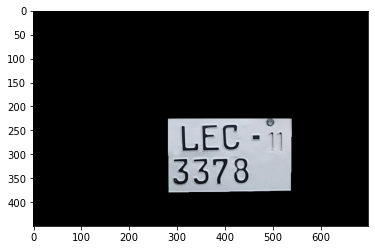

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

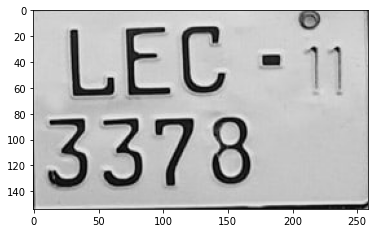

In [11]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## Using OCR for reading test

In [12]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[17, 0], [159, 0], [159, 79], [17, 79]], 'LEC', 0.9997176142525164),
 ([[0, 72], [178, 72], [178, 148], [0, 148]], '3378', 0.9999988675117493)]

In [13]:
text1  = result[0][-2]

In [14]:
text2 = result[1][-2]

## Our output

In [15]:
text = text1 + text2
text

'LEC3378'

## Importing SQL

In [24]:
import mysql.connector

## Creating database named cars

In [38]:


mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE DATABASE cars")

## Connect to database

In [46]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database = 'cars'
)

In [47]:
#Creating a cursor object using the cursor() method
mycursor = mydb.cursor()


## Creating table

In [53]:
#Creating table as per requirement
mycursor.execute("CREATE TABLE CARS (id INT AUTO_INCREMENT PRIMARY KEY, number_plate VARCHAR(255))")



## Inserting data

In [69]:
sql = "INSERT INTO CARS (id,number_plate) VALUES(%s, %s)"
val = (1,text)
mycursor.execute(sql, val)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

1 record inserted.


## Output from database:

In [70]:
mycursor.execute("SELECT * FROM CARS")

myresult = mycursor.fetchall()

for x in myresult:
  print(x)

(1, 'LEC3378')


## Deleting uncessary data from database(optional)

In [68]:
sql = "DELETE FROM CARS WHERE number_plate  = 'LEC3378' "

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) deleted")

2 record(s) deleted
